# Module 1 Tutorial

There are numerous open-source libraries, collections of functions, that have been developed in Python that we will make use of in this course.

The first one is called NumPy and you can find the documentation [here](https://numpy.org/). It is one of the most widely-used libraries for scientific computating in python. The second library we will use will be a module from Scipy, called scipy.stats ([scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)), and the third is a library for handling database-like structures called Pandas for which you can find the documentation at this link: [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html). Finally, we will use a plotting/visualisation tool called Matplotlib ([Matplotlib documentation](https://matplotlib.org/)).

We import the libraries with the following statement:

In [1]:
import numpy
from scipy import stats
import pandas
from matplotlib import pyplot

As one of the main ideas in module 1 was visualising and exploring data, let's begin with showing code to visualise our data.
First, we need to have some data to work with. We will load in two datasets, one containing continuous data and one containing discrete data. 

In [2]:
continuous_data = pandas.read_csv(
        r'https://raw.githubusercontent.com/imheidimarais/Engineering-Statistics/master/data/Normal_Data.csv'
    )
discrete_data = pandas.read_csv(
        r'https://raw.githubusercontent.com/imheidimarais/Engineering-Statistics/master/data/Discrete_Data.csv'
    )

We can investigate the sizes of our datasets:

In [3]:
print(f"Size of continuous data: {continuous_data.shape[0]} rows, {continuous_data.shape[1]} column(s).")
print(f"Size of discrete data: {discrete_data.shape[0]} rows, {discrete_data.shape[1]} column(s).")

Size of continuous data: 50 rows, 1 column(s).
Size of discrete data: 50 rows, 1 column(s).


So we see that we are working with a single sample, containing 50 values of the variable, in both cases. 

The first type of visualisation tool that was discussed was the histogram. We can construct a histogram several different ways. We will use the built-in histogram function that comes with pandas DataFrames ([pandas histogram documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)). Because we have a single column we do not have to do much, but we will specify the column that we want to plot as the 0th column (the first and only column in the DataFrame) for the sake of completeness.

Note that from here on in the code we will never reference our sample via the column names, we will use the column number in order to make the code more general and easier to use with different datasets that you may want to test it on.

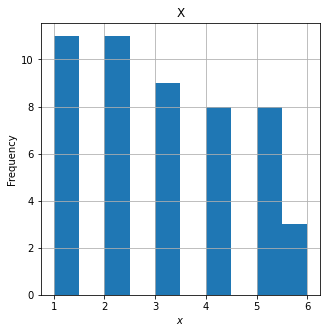

In [4]:
fig = pyplot.Figure(figsize=(5, 5))
ax1 = fig.add_subplot(1, 1, 1)

discrete_data.hist(column=discrete_data.columns[0], ax=ax1) 

ax1.set(
        xlabel='$x$',
        ylabel='Frequency'
    )
fig  # this just displays the figure in the cell output

You can see it is very simple to let the plotting libraries select the number of bins desired in the histogram and perform the calculations. However, we see there are gaps in the plot due to the automatic selection of the bins. If we were interested in selecting the bins ourselves, perhaps in a specific problem we know something about our data, we could do that. 

Let's look at the discrete data:

In [5]:
unique_values = pandas.unique(discrete_data[discrete_data.columns[0]])
print(f"The unique values found in the DataFrame are: {unique_values}")

The unique values found in the DataFrame are: [4. 1. 3. 2. 5. 6.]


So in this case we could specify our bins manually according to the values we have in our data. We use the range function which takes a start point, a stop point, and an increment size. The stop point is not included in the range.

The bounds of the bins are: [1, 2, 3, 4, 5, 6, 7]


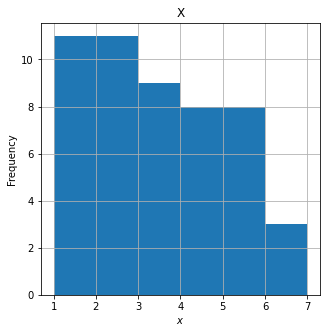

In [6]:
bins = list(range(1, 8, 1)) # this will change based on your dataset
print(f"The bounds of the bins are: {bins}")
fig = pyplot.Figure(figsize=(5, 5))
ax1 = fig.add_subplot(1, 1, 1)

discrete_data.hist(column=discrete_data.columns[0], bins=bins, ax=ax1)

ax1.set(
        xlabel='$x$',
        ylabel='Frequency'
    )
fig

We can see that our data is divided nicely now according to the values that we have. However, for the continuous data we cannot so easily specify precise bounds for the bins, only how many we would like to have. For example:

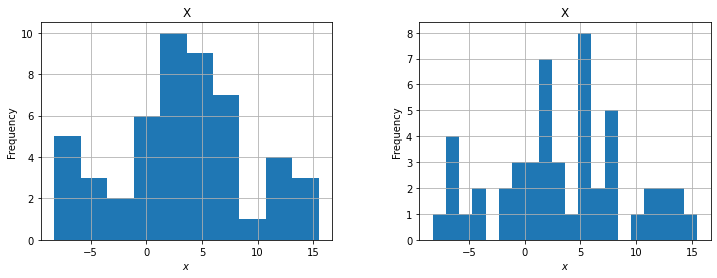

In [7]:
number_bins1 = 10
number_bins2 = 20
fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

continuous_data.hist(column=continuous_data.columns[0], bins=number_bins1, ax=ax1)
continuous_data.hist(column=continuous_data.columns[0], bins=number_bins2, ax=ax2)

ax1.set(
        xlabel='$x$',
        ylabel='Frequency'
    )

ax2.set(
        xlabel='$x$',
        ylabel='Frequency'
    )
fig

Here we see the effect of changing the number of bins on the appearance of the histogram.

The second type of visualisation tool that was discussed was the index plot. We do this with the pandas plot function, and specify a scatter type, while plotting against the index ([pandas plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)).

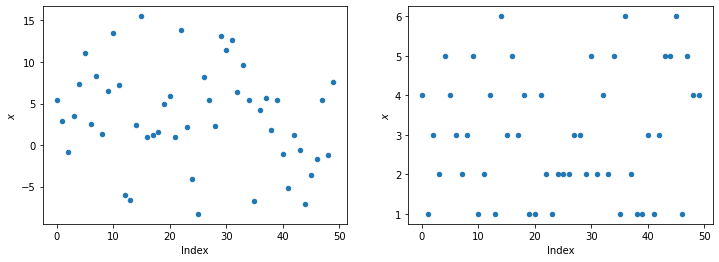

In [8]:
fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

continuous_data.reset_index().plot(x='index', y=continuous_data.columns[0], kind='scatter', ax=ax1)
discrete_data.reset_index().plot(x='index', y=discrete_data.columns[0], kind='scatter', ax=ax2)

ax1.set(
        xlabel='Index',
        ylabel='$x$'
    )

ax2.set(
        xlabel='Index',
        ylabel='$x$'
    )
fig

Because of the way the data is stored in the DataFrame we must use 'reset_index()' before plotting to generate the index column to plot against. But above you can see the index plots for the continuous data (left) and the discrete data (right). Admittedly it is a bit more useful for the continuous data as we get a better idea of the mean and spread of the data.

Moving on to the boxplots, this is again done quite simply with pandas ([pandas boxplot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)):

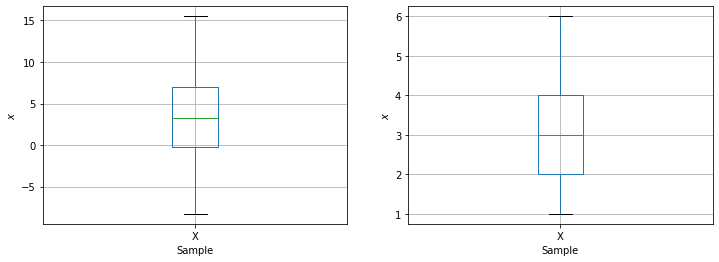

In [9]:
fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

continuous_data.boxplot(column=continuous_data.columns[0], ax=ax1)
discrete_data.boxplot(column=discrete_data.columns[0], ax=ax2)

ax1.set(
        xlabel='Sample',
        ylabel='$x$'        
    )

ax2.set(
        xlabel='Sample',
        ylabel='$x$'        
    )
fig

On the left we see the continuous data, and on the right the discrete. Neither of these datasets contain suspected outliers.

Finally we must look at the empirical cumulative distribution function. This requires a little bit more thought than the other figures we have produced so far..

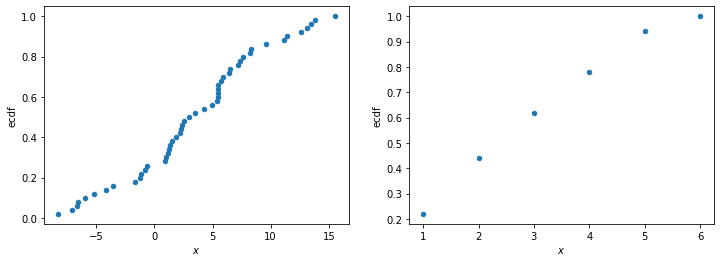

In [10]:
continuous_data_sorted = continuous_data.sort_values(by=continuous_data.columns[0], ascending=True) #sort the data by x-value
ecdf = [n/continuous_data_sorted.shape[0] for n in range(1, continuous_data_sorted.shape[0]+1)] 
# In the above line we calculate the proportion of values equal or less than the given x for contiuous data.
continuous_data_sorted['ecdf'] = numpy.array(ecdf)

discrete_data_ecdf = discrete_data.value_counts(sort=False, ascending=True, normalize=True).cumsum()
discrete_data_ecdf = discrete_data_ecdf.reset_index(drop=True).to_frame()
unique_values = numpy.unique(discrete_data[discrete_data.columns[0]])
discrete_data_ecdf['Unique Values'] = unique_values

fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

continuous_data_sorted.plot(x=continuous_data_sorted.columns[0], y='ecdf', kind='scatter', ax=ax1)
discrete_data_ecdf.plot(x='Unique Values', y=discrete_data_ecdf.columns[0], kind='scatter', ax=ax2)

ax1.set(
        xlabel='$x$',
        ylabel='ecdf'   
    )

ax2.set(
        xlabel='$x$',
        ylabel='ecdf'
    )
fig

The block of code above may appear a bit convoluted, which it is in an attempt to write code that is more general and can be applied to unkown datasets. Just remember the principle of what is being plotted in an ecdf; the fraction of observations equal to, or less than, the given x value, versus the x value. This means the plots should always start with a y value above zero, and end with a y value of exactly one. 

Next to discuss is the statistics that we can calculate from our sample data. We could obtain the mean, and variance individually, or we could use a built in pandas function called describe. We see this for the continuous data below:

In [11]:
descriptive_statistics_continous_data = continuous_data.describe()
print(descriptive_statistics_continous_data)

               X
count  50.000000
mean    3.443760
std     5.887546
min    -8.280000
25%    -0.247500
50%     3.210000
75%     7.022500
max    15.500000


What we see returned is the sample size, the mean of our sample, the standard deviation, the minumum, maximum, and different percentiles. We can access the different information from each column by name or by index:

In [12]:
print(descriptive_statistics_continous_data[continuous_data.columns[0]]["mean"])
print(descriptive_statistics_continous_data[continuous_data.columns[0]][1])

3.44376
3.44376


We can also calculate the standard error using the scipy stats function.

In [13]:
standard_error_continuous_data = stats.sem(continuous_data[continuous_data.columns[0]])
print(f"standard error: {standard_error_continuous_data}")

standard error: 0.8326246965800991


For a sanity check, we can compute the values ourselves to confirm the libraries are using the equations we expect:

In [14]:
n = continuous_data[continuous_data.columns[0]].shape[0] # the sample size
mean = (1/n)*continuous_data[continuous_data.columns[0]].sum() 
variance = (1/(n-1))*((continuous_data[continuous_data.columns[0]] - mean)**2).sum()
standard_deviation = numpy.sqrt(variance)
standard_error = standard_deviation/numpy.sqrt(n)

print(f"Sample Size: {n}")
print(f"Sample Mean: {mean}")
print(f"Sample Variance: {variance}, Sample Standard Deviation: {standard_deviation}")
print(f"Standard Error: {standard_error}")

Sample Size: 50
Sample Mean: 3.4437600000000006
Sample Variance: 34.663194267755095, Sample Standard Deviation: 5.887545691351796
Standard Error: 0.832624696580099


There is one final thing you may be interested in doing, generating normally distributed data that has the same mean and variance as your sample, to compare the distributions. There is a simple way to do this using numpy. 
First, we create a random generator. Then, specifying the mean, standard deviation, and the number of observations we desire, we can generate this normally distributed data.

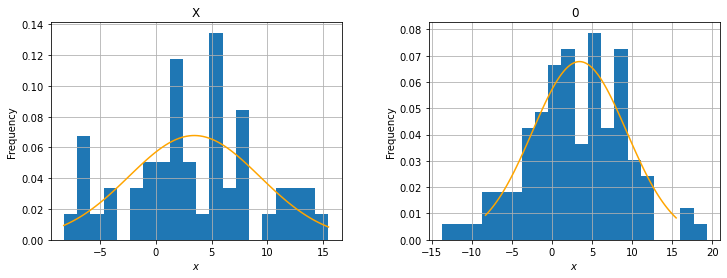

In [15]:
rng = numpy.random.default_rng()
normally_distributed_data = rng.normal(loc=mean, scale=standard_deviation, size=100)
normally_distributed_data = pandas.DataFrame(normally_distributed_data)

number_bins = 20
fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

continuous_data.hist(column=continuous_data.columns[0], bins=number_bins, density=True, ax=ax1)
normally_distributed_data.hist(column=normally_distributed_data.columns[0], bins=number_bins, density=True, ax=ax2)

xrange1 = (continuous_data[continuous_data.columns[0]].min(), continuous_data[continuous_data.columns[0]].max())
normal_pdf_xs = numpy.linspace(xrange1[0], xrange1[1], 100)
normal_pdf_ys = stats.norm.pdf(normal_pdf_xs, loc=mean, scale=standard_deviation)
ax1.plot(normal_pdf_xs, normal_pdf_ys, c="orange")
ax2.plot(normal_pdf_xs, normal_pdf_ys, c="orange")



ax1.set(
        xlabel='$x$',
        ylabel='Frequency'
    )

ax2.set(
        xlabel='$x$',
        ylabel='Frequency'
    )
fig

To the left we see our sample data in the histogram we plotted previously, and to the right we see the normally distributed data with the same mean and variance as our data, also as a histogram. Overlayed on both of these plots is the theoretical pdf for the normal distribution with the given mean and variance. It seems unlikely that this data is normally discributed due to the 'holes' before 5 and around 6. 